<h2>Squirrel Diet Project</h2>

This project based on  results of a mock study where 100 red squirrels were given one of three different diets after weaning, and their full grown adult weights were recorded. The figure below displays the results of the study, and this is the figure that I am going to recreate on my own.

![Image of Figure](https://practicum-content.s3.us-west-1.amazonaws.com/resources/dataviz_finalproject_1678790840.png)

<h3>Project guidelines</h3>

I have to recreate the figure as closely as possible, which entails the same:
<ul>
    <li>Title and axis labels</li>
    <li>Axis ticks and ranges</li>
    <li>Legend</li>
   <li>Magenta and green data points (colors don’t need to be exact)</li>
    <li>Grouping and presentation of the data</li>
</ul>

<h3>Data Preprocessing</h3>

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading dataset
try:
    squirrel = pd.read_csv('~/Documents/Studying/datasets/squirrel_diet.csv')

except FileNotFoundError:
    squirrel = pd.read_csv('/datasets/squirrel_diet.csv')
    
squirrel

,sex,diet,weight
0,0,3,1.042
1,1,3,1.196
2,1,2,1.401
3,1,1,1.015
4,0,2,1.141
...,...,...,...
95,0,1,0.995
96,1,2,1.979
97,0,3,1.099
98,0,2,1.327


In [3]:
#gathering info of dataset
squirrel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     100 non-null    int64  
 1   diet    100 non-null    int64  
 2   weight  100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


All column headers formatted in the same correct style.

In [4]:
#checking for duplicates
squirrel.duplicated().sum()

0

In our dataset there are no duplicates.

In [5]:
#checking for missing values
squirrel.isna().sum()

sex       0
diet      0
weight    0
dtype: int64

In our dataset there are no missing values.

<h3>Figure recreating</h3>

In [6]:
#defining function 'squirrel_sex' to transform int64 into strings
def squirrel_sex(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'
#adding new column
squirrel['squirrel_sex'] = squirrel['sex'].apply(squirrel_sex)

squirrel.head(10)

,sex,diet,weight,squirrel_sex
0,0,3,1.042,Female
1,1,3,1.196,Male
2,1,2,1.401,Male
3,1,1,1.015,Male
4,0,2,1.141,Female
5,1,2,1.113,Male
6,1,3,1.213,Male
7,0,3,1.132,Female
8,0,1,1.034,Female
9,0,1,1.045,Female


Using function 'squirrel_sex' I added additional column which shows '1's and '0's as string variables 'Male' and 'Female' accordingly as it presented on the original figure.

In [7]:
#defining function 'diet_label' to transform int64 into strings
def diet_label(diet):
    if diet == 1:
        return 'A'
    elif diet == 2:
        return 'B'
    else:
        return 'C'
#adding new column
squirrel['diet_label'] = squirrel['diet'].apply(diet_label)

squirrel.head(10)

,sex,diet,weight,squirrel_sex,diet_label
0,0,3,1.042,Female,C
1,1,3,1.196,Male,C
2,1,2,1.401,Male,B
3,1,1,1.015,Male,A
4,0,2,1.141,Female,B
5,1,2,1.113,Male,B
6,1,3,1.213,Male,C
7,0,3,1.132,Female,C
8,0,1,1.034,Female,A
9,0,1,1.045,Female,A


Using function 'diet_label' I added additional column which shows '1's, '2's and '3's as strings 'A', 'B' and 'C' accordingly as it presented on the original figure.

C:\Installed\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Installed\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Adult Weight/lbs')

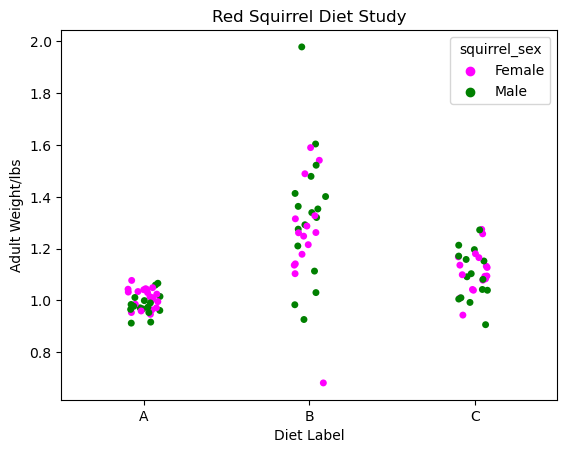

In [8]:
#creating a scatter plot with original styling
sns.stripplot(
    x = 'diet_label', #setting new 'diet_label' columns as x-axis
    y = 'weight', #setting 'weight' column as y-axis
    hue = 'squirrel_sex', #setting which data column represented on figure will use colors
    palette = ['magenta', 'green'], #setting original colors
    order = ['A','B','C'], #setting order of scatter plots 
    data = squirrel, #setting dataset which plot will use
    hue_order = ['Female', 'Male'] #setting order of coloring
            ).set(title = 'Red Squirrel Diet Study') #setting title
#using matplotlib.pyplot library to set names for axes
plt.xlabel('Diet Label')
plt.ylabel('Adult Weight/lbs')

Original figure was recreated using seaborn for a plot and using matplotlib.pyplot for setting labels for axes.